# Data EDA

In this part we are going to do some exploratory analysis on our data

In [1]:
# Imports
import pandas as pd

# Graphs
import matplotlib.pyplot as plt
import seaborn as sns

# World Cloud
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
df = pd.read_csv("salary_cleaned.csv")

In [3]:
df.describe()

,index,Rating,Founded,hourly,min_salary,max_salary,avg_salary,age,python_yn,rstudio_yn,spark_yn,aws_yn,excel_yn,same_state,competitor_count,desc_len
count,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000
mean,2167.667350,3.282945,1478.795391,0.005378,82.271191,134.021767,107.876184,36.815877,0.526248,0.004609,0.229449,0.241997,0.474264,0.311140,0.801793,3572.473239
std,1248.274307,1.576432,856.114692,0.073145,34.111354,44.671986,38.621977,50.429641,0.499374,0.067745,0.420533,0.428348,0.499401,0.463019,1.281627,2013.951293
min,0.000000,-1.000000,-1.000000,0.000000,12.000000,52.000000,18.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000
25%,1120.000000,3.200000,-1.000000,0.000000,54.000000,97.000000,73.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2114.000000
50%,2163.000000,3.700000,1976.000000,0.000000,76.000000,129.000000,104.500000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3306.000000
75%,3250.000000,4.100000,2002.000000,0.000000,110.000000,165.000000,133.000000,46.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,4687.000000
max,4379.000000,5.000000,2020.000000,1.000000,200.000000,254.000000,225.000000,397.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,19895.000000


In [4]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'company_name', 'age', 'python_yn', 'rstudio_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'same_state', 'job_simple', 'seniority', 'job_state',
       'competitor_count', 'desc_len'],
      dtype='object')

## 1. Looking at Distributions

<AxesSubplot:>

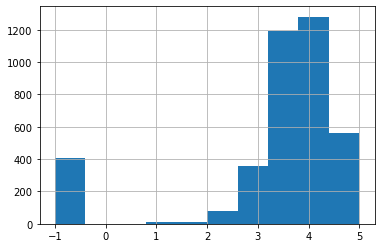

In [21]:
# Rating
df.Rating.hist()

<AxesSubplot:>

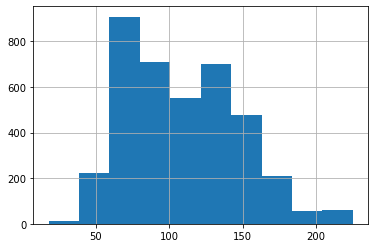

In [22]:
# avg_salary
df.avg_salary.hist()

<AxesSubplot:>

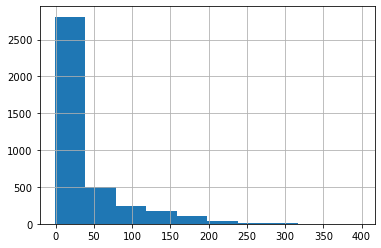

In [23]:
# age
df.age.hist()

<AxesSubplot:>

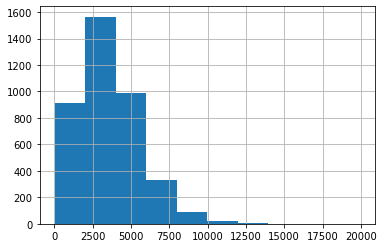

In [24]:
# desc_len
df.desc_len.hist()

<AxesSubplot:>

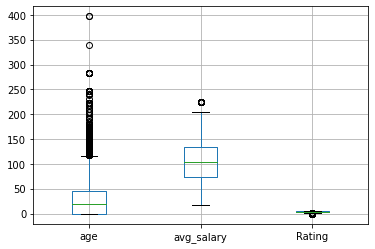

In [16]:
df.boxplot(column = ['age', 'avg_salary', 'Rating'])

## Correlation Matrix

In [27]:
df[["age", 'avg_salary', 'Rating', 'desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,-0.025365,0.209700,0.385857
avg_salary,-0.025365,1.000000,0.057260,-0.004166
Rating,0.209700,0.057260,1.000000,0.078266
desc_len,0.385857,-0.004166,0.078266,1.000000


<AxesSubplot:>

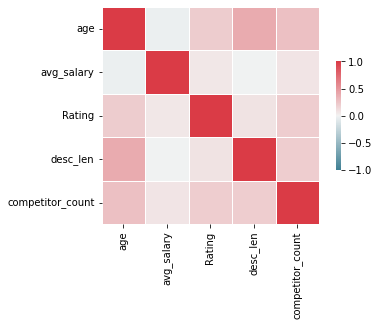

In [35]:
# Making graphical correlation matrix
sns.heatmap(df[['age', 'avg_salary', 'Rating', 'desc_len', 'competitor_count']].corr(), vmin=-1, center=0, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, linewidth=.5, cbar_kws={'shrink' : .5})

There seem not to be any multicollinearity issues between age, avg_salary, rating, desc_len, and competitor_count

## 3. Graphing Categories

In [7]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
             'company_name', 'job_state', 'same_state', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simple',
             'seniority', 'python_yn', 'rstudio_yn']]

Location - Total = 189


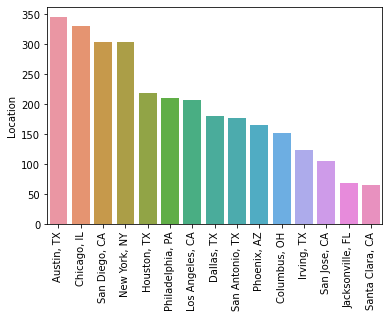

Headquarters - Total = 543


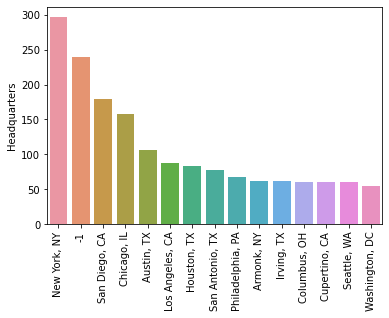

Size - Total = 9


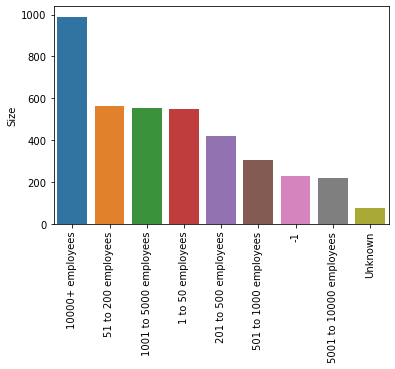

Type of ownership - Total = 15


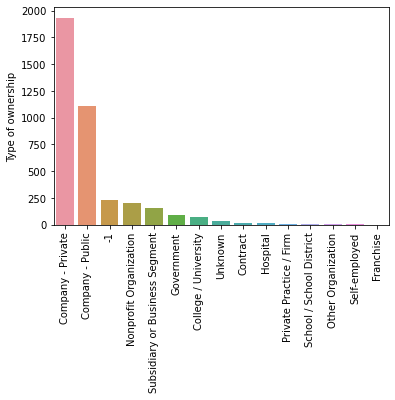

Industry - Total = 96


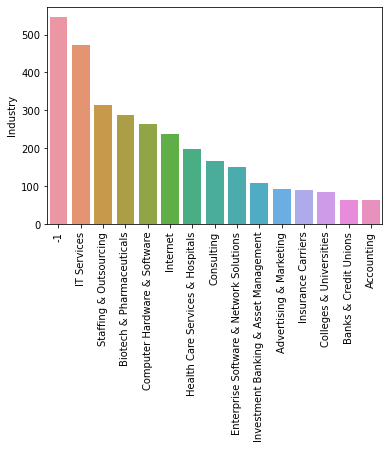

Sector - Total = 26


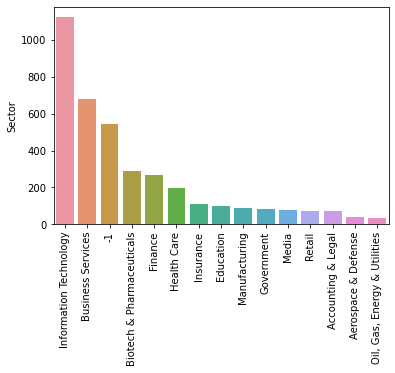

Revenue - Total = 14


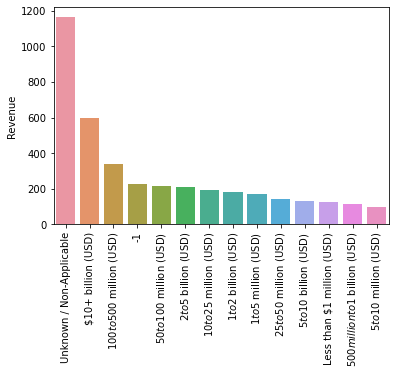

company_name - Total = 2063


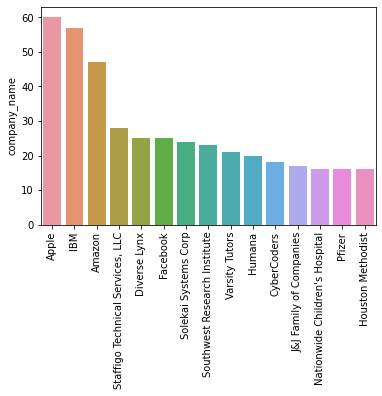

job_state - Total = 10


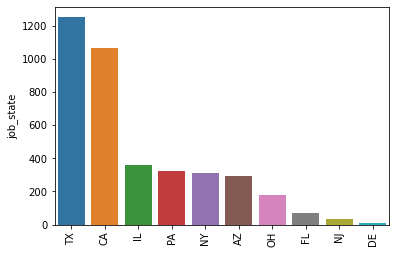

same_state - Total = 2


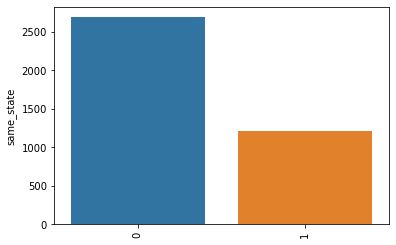

spark_yn - Total = 2


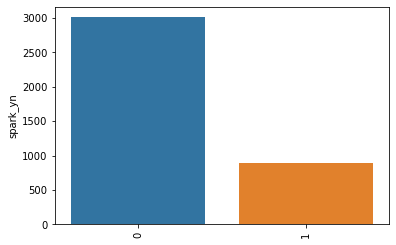

aws_yn - Total = 2


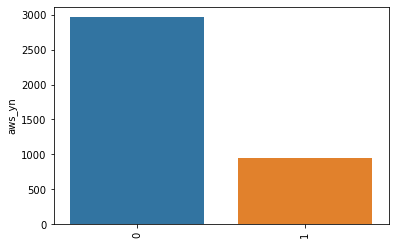

excel_yn - Total = 2


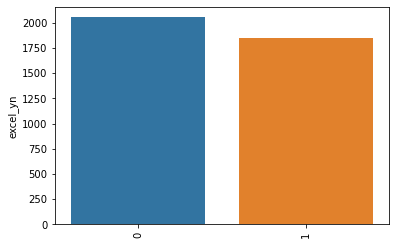

job_simple - Total = 6


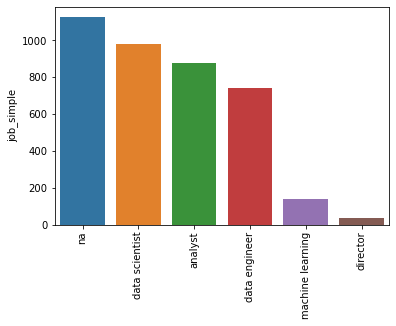

seniority - Total = 3


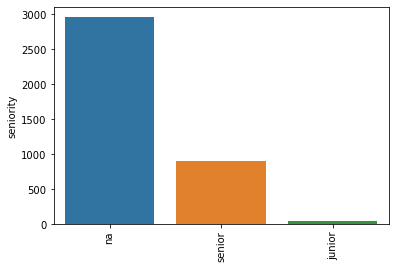

python_yn - Total = 2


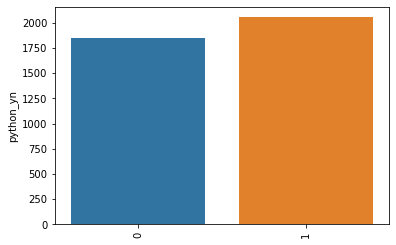

rstudio_yn - Total = 2


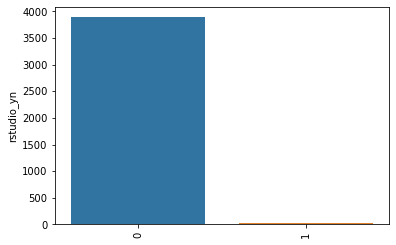

In [8]:
for i in df_cat.columns:
    print(i + ' - Total = ' + str(len(df_cat[i].value_counts())))
    fig = sns.barplot(x=df_cat[i].value_counts().index[:15], y=df_cat[i].value_counts()[:15])
    fig.set_xticklabels (fig.get_xticklabels(), rotation=90)
    plt.show()

In [6]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'company_name', 'age', 'python_yn', 'rstudio_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'same_state', 'job_simple', 'seniority', 'job_state',
       'competitor_count', 'desc_len'],
      dtype='object')

## 4. Grouping with Pivot Tables

In [46]:
pd.pivot_table(df, index = 'job_simple', values = 'avg_salary')

,avg_salary
job_simple,
analyst,100.874858
data engineer,100.993261
data scientist,124.569176
director,99.472222
machine learning,121.053571
na,101.929333


In [49]:
pd.pivot_table(df, index = ['job_simple', 'seniority'], values = 'avg_salary')

avg_salary
job_simple       seniority            
analyst          junior     100.724138
                 na         101.750356
                 senior      96.717687
data engineer    junior     105.428571
                 na         100.311847
                 senior     103.229814
data scientist   junior     104.500000
                 na         123.855607
                 senior     126.296636
director         na          95.661290
                 senior     123.100000
machine learning na         125.400862
                 senior     100.041667
na               junior      98.500000
                 na         100.736127
                 senior     106.413866

In [50]:
pd.pivot_table(df, index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_state,
NY,135.677316
DE,133.550000
CA,132.782975
NJ,118.687500
AZ,97.349153
TX,95.347167
PA,94.675926
OH,94.093220
IL,85.004132


In [52]:
pd.pivot_table(df, index = ['job_state', 'job_simple'], values = 'avg_salary').sort_values('job_state', ascending=False)

avg_salary
job_state job_simple                  
TX        na                 92.691520
          machine learning   97.375000
          director           85.200000
          data scientist    108.070423
          data engineer      94.960568
          analyst            90.335347
PA        na                 96.836879
          machine learning   94.500000
          director           85.388889
          data scientist     93.067308
          data engineer      94.480392
          analyst            92.757576
OH        data scientist    120.787500
          analyst            93.851852
          data engineer      78.858974
          na                 87.084615
          machine learning   92.166667
NY        na                134.916667
          machine learning  136.041667
          director          135.250000
          data scientist    135.601485
          data engineer     130.970588
          analyst           138.386364
NJ        data scientist    130.527778
          na                126.833333
          machine learning  107.500000
          data engineer      95.000000
          analyst            96.312500
IL        na                 80.917647
          machine learning   91.954545
          director           92.500000
          data scientist     89.116162
          data engineer      93.685714
          analyst            76.936842
FL        data engineer      78.208333
          na                 77.685185
          director           71.000000
          data scientist     77.500000
          analyst            76.739130
DE        data scientist    135.400000
          data engineer      92.833333
          na                190.000000
CA        na                120.088732
          machine learning  148.200000
          director          123.277778
          data scientist    148.158940
          data engineer     130.268657
          analyst           129.722488
AZ        director          116.000000
          data scientist    115.478261
          data engineer      95.804124
          machine learning   76.700000
          na                 93.202899
          analyst            92.980263

In [53]:
pd.pivot_table(df, index = ['job_state', 'job_simple'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending=False)

avg_salary
job_state job_simple                  
TX        na                       342
          machine learning          40
          director                  10
          data scientist           213
          data engineer            317
          analyst                  331
PA        na                       141
          machine learning           5
          director                   9
          data scientist            52
          data engineer             51
          analyst                   66
OH        data scientist            40
          analyst                   27
          data engineer             39
          na                        65
          machine learning           6
NY        na                        36
          machine learning          12
          director                   2
          data scientist           202
          data engineer             17
          analyst                   44
NJ        data scientist            18
          na                         3
          machine learning           1
          data engineer              2
          analyst                    8
IL        na                        85
          machine learning          11
          director                   3
          data scientist            99
          data engineer             70
          analyst                   95
FL        data engineer             12
          na                        27
          director                   1
          data scientist             6
          analyst                   23
DE        data scientist             5
          data engineer              3
          na                         2
CA        na                       355
          machine learning          60
          director                   9
          data scientist           302
          data engineer            134
          analyst                  209
AZ        director                   2
          data scientist            46
          data engineer             97
          machine learning           5
          na                        69
          analyst                   76

In [56]:
pd.pivot_table(df[df.job_simple == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_state,
CA,148.158940
NY,135.601485
DE,135.400000
NJ,130.527778
OH,120.787500
AZ,115.478261
TX,108.070423
PA,93.067308
IL,89.116162


## 5. Salary compared to other variables

In [64]:
df_pivots = df[['Rating', "Industry", 'Sector', 'Revenue', 'competitor_count', 'hourly', 
              'python_yn', 'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Type of ownership', 'avg_salary']]

In [67]:
for i in df_pivots:
    if i == 'avg_salary':
        break
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values(i, ascending=False))

Rating
        avg_salary
Rating            
 5.0    109.328125
 4.9    103.322222
 4.8    121.250000
 4.7    110.033898
 4.6    108.601351
 4.5    122.856481
 4.4    122.519737
 4.3    102.752101
 4.2    109.496753
 4.1    119.080882
 4.0    106.917500
 3.9    110.372483
 3.8    110.140756
 3.7    101.431034
 3.6    109.083333
 3.5    106.772727
 3.4    103.270270
 3.3    104.357143
 3.2    100.176471
 3.1    110.769912
 3.0    104.592308
 2.9    102.325397
 2.8    105.258621
 2.7    104.275862
 2.6     85.870370
 2.5     87.787879
 2.4    113.250000
 2.3    123.750000
 2.2     79.944444
 2.1    152.333333
 2.0    116.875000
 1.9    101.333333
 1.7     73.000000
 1.6     99.000000
 1.5    124.000000
 1.0    112.850000
-1.0    104.342298
Industry
                                      avg_salary
Industry                                        
Wholesale                             107.863636
Video Games                           131.933333
Venture Capital & Private Equity       85.75000

In [69]:
# Might want to do some other skills/ratio
pd.pivot_table(df, index='Revenue', columns='python_yn', values='avg_salary', aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),100,80
$1 to $5 million (USD),83,87
$10 to $25 million (USD),96,95
$10+ billion (USD),219,376
$100 to $500 million (USD),156,182
$2 to $5 billion (USD),135,76
$25 to $50 million (USD),57,86
$5 to $10 billion (USD),60,73
$5 to $10 million (USD),54,46


## 6. World Cloud

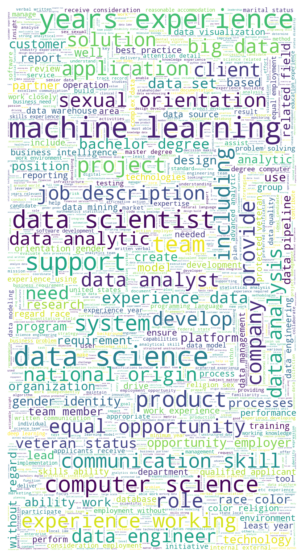

In [80]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color='white', random_state=1, stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()